# 07.04 - TENSORFLOW

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

endpoint https://m5knaekxo6.execute-api.us-west-2.amazonaws.com/dev-v0001/rlxmooc


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from local.lib import mlutils
from IPython.display import Image

try:
    %tensorflow_version 2.x
    print ("Using TF2 in Google Colab")
except:
    pass

import tensorflow as tf
%matplotlib inline

## A dataset (again)

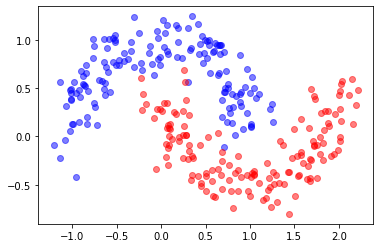

In [4]:
## KEEPOUTPUT
from sklearn.datasets import make_moons
X,y = make_moons(300, noise=.15)
plt.scatter(X[:,0][y==0], X[:,1][y==0], color="blue", label="class 0", alpha=.5)
plt.scatter(X[:,0][y==1], X[:,1][y==1], color="red", label="class 1", alpha=.5)

## A neural network in tensorflow, 4 neurons in the hidden layer, 1 output

In [170]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=.5),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy'])

In [171]:
## KEEPOUTPUT
model.fit(X,y, epochs=10, batch_size=1)

Epoch 1/10
300/300 [==============================] - 0s 480us/step - loss: 0.4007 - accuracy: 0.8267
Epoch 2/10
300/300 [==============================] - 0s 478us/step - loss: 0.3605 - accuracy: 0.8467
Epoch 3/10
300/300 [==============================] - 0s 469us/step - loss: 0.2444 - accuracy: 0.8900
Epoch 4/10
300/300 [==============================] - 0s 473us/step - loss: 0.1709 - accuracy: 0.9467
Epoch 5/10
300/300 [==============================] - 0s 470us/step - loss: 0.1837 - accuracy: 0.9467
Epoch 6/10
300/300 [==============================] - 0s 455us/step - loss: 0.1485 - accuracy: 0.9600
Epoch 7/10
300/300 [==============================] - 0s 467us/step - loss: 0.1072 - accuracy: 0.9633
Epoch 8/10
300/300 [==============================] - 0s 456us/step - loss: 0.0981 - accuracy: 0.9667
Epoch 9/10
300/300 [==============================] - 0s 472us/step - loss: 0.1252 - accuracy: 0.9600
Epoch 10/10
300/300 [==============================] - 0s 465us/step - loss: 0.125

(0.5318, 0.4682)

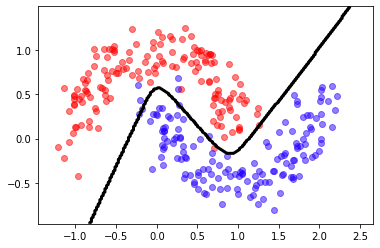

In [173]:
## KEEPOUTPUT
predict = lambda X: (model.predict(X)[:,0]>.5).astype(int)
mlutils.plot_2Ddata_with_boundary(predict, X, y)

## A bigger network

- different activation functions
- different optimizer

In [215]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy'])

In [216]:
## KEEPOUTPUT
model.fit(X,y, epochs=10, batch_size=1)

Epoch 1/10
300/300 [==============================] - 0s 510us/step - loss: 0.3400 - accuracy: 0.8567
Epoch 2/10
300/300 [==============================] - 0s 508us/step - loss: 0.2804 - accuracy: 0.8867
Epoch 3/10
300/300 [==============================] - 0s 487us/step - loss: 0.2450 - accuracy: 0.8967
Epoch 4/10
300/300 [==============================] - 0s 532us/step - loss: 0.1722 - accuracy: 0.9433
Epoch 5/10
300/300 [==============================] - 0s 516us/step - loss: 0.1660 - accuracy: 0.9500
Epoch 6/10
300/300 [==============================] - 0s 527us/step - loss: 0.0917 - accuracy: 0.9700
Epoch 7/10
300/300 [==============================] - 0s 516us/step - loss: 0.1127 - accuracy: 0.9667
Epoch 8/10
300/300 [==============================] - 0s 507us/step - loss: 0.1118 - accuracy: 0.9600
Epoch 9/10
300/300 [==============================] - 0s 526us/step - loss: 0.1076 - accuracy: 0.9500
Epoch 10/10
300/300 [==============================] - 0s 487us/step - loss: 0.084

(0.522575, 0.477425)

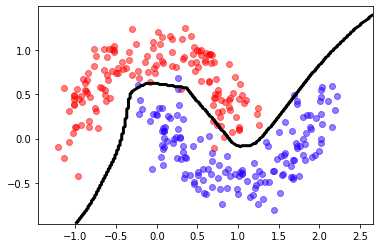

In [217]:
## KEEPOUTPUT
predict = lambda X: (model.predict(X)[:,0]>.5).astype(int)
mlutils.plot_2Ddata_with_boundary(predict, X, y)

## Cross entropy - multiclass classification

follow [THIS EXAMPLE](https://www.tensorflow.org/tutorials/keras/classification) in TensorFlow doc site. Observe that:

- labels corresponding to a 10-class classification problem
- the network contains 10 output neurons, one per output class
- the loss function is `SparseCategoricalCrossEntropy`

Observe how **cross entropy** works with 4 classes:

- first we convert the output to a one-hot encoding
- we create a network with two output neurons with sigmoid activation
- interpret each neuron's output as elements of a probability distribution
- normalize the probability distribution (must add up to one)
- we consider network output is better when it yields more probability to the correct class

**expected classes for five data points**

In [239]:
## KEEPOUTPUT
y = np.random.randint(4, size=5)
y

array([3, 1, 2, 0, 3])

**convert it to one hot encoding**

In [240]:
## KEEPOUTPUT
y_ohe = np.eye(4)[y].astype(int)
y_ohe

array([[0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1]])

**simulate some neural network output with NO ACTIVATION function**

with 10 output neurons, so for each input element (we have five) we have 4 outputs.

this is called **LOGITS** in Tensorflow

In [241]:
## KEEPOUTPUT
y_hat = np.round(np.random.normal(size=y_ohe.shape), 2)
y_hat

array([[ 0.06, -0.31, -0.95,  0.39],
       [ 0.92, -0.48, -0.08,  0.53],
       [-0.5 ,  0.22, -0.18,  1.81],
       [-0.49, -1.41,  0.09, -0.11],
       [-0.73,  0.26, -1.63, -0.68]])

**normalize LOGITS**. This is the **SOFTMAX function**

**LOGITS**  obtained from network last layer with no activation

$$\hat{\mathbf{y}}^{(i)} = [\hat{y}^{(i)}_0, \hat{y}^{(i)}_1,...,\hat{y}^{(i)}_9]$$

**SOFTMAX ACTIVATION**

$$\hat{\bar{\mathbf{y}}}^{(i)} = [\hat{\bar{y}}^{(i)}_0, \hat{\bar{y}}^{(i)}_1,...,\hat{\bar{y}}^{(i)}_9]$$

with 

$$\hat{\bar{y}}^{(i)}_k = \frac{e^{\hat{y}^{(i)}_k}}{\sum_{j=0}^9e^{\hat{y}^{(i)}_j}}$$


this ensures:

- $\sum_{k=0}^9 \hat{\bar{y}}^{(i)}_k=1$
- $0 \le \hat{\bar{y}}^{(i)}_k \le 1$

this way, for each input we have a nice probability distribution in its outputs.

This is implemented in **Tensorflow**

In [242]:
## KEEPOUTPUT
y_hatb = tf.nn.softmax(y_hat).numpy()
y_hatb

array([[0.29019814, 0.20044982, 0.10569567, 0.40365637],
       [0.43638904, 0.10761221, 0.16053855, 0.2954602 ],
       [0.06893706, 0.14162659, 0.09493514, 0.69450122],
       [0.21519991, 0.08576126, 0.38435531, 0.31468351],
       [0.19420963, 0.52266365, 0.07895974, 0.20416697]])

check sums

In [243]:
## KEEPOUTPUT
y_hatb.sum(axis=1)

array([1., 1., 1., 1., 1.])

how would you now measure how closely `y_hatb` is to the expected output on `y_ohe`?

**cross entropy**: just take the probability assigned to the correct class (and pass it through a log function)

$$\text{loss}(\bar{\mathbf{y}}^{(i)}, \hat{\bar{\mathbf{y}}}^{(i)}) = -\sum_{k=0}^9 \bar{y}^{(i)}_k\log(\hat{\bar{y}}^{(i)}_k)$$

where $\bar{\mathbf{y}}^{(i)}$ is the one-hot encoding of the expected class (label) for data point $i$.

observe that, 

- in the one-hot encoding $\bar{\mathbf{y}}^{(i)}$ only one of the elements will be 1, and the rest will be 0's, so the sumation above is only taking the log of the probability of the correct label.
- the negative sign accounts for logs of values <1 are negative and we will later want to **minimize** the loss

This is implemented in **Tensorflow**

In [253]:
## KEEPOUTPUT
tf.keras.losses.categorical_crossentropy(y_ohe, y_hatb)

<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.90719134, 2.22922115, 2.35456137, 1.53618786, 1.58881713])>

Observe that TensorFlow also implements the corresponding **sparse** convenience function that works directly with our labels

In [261]:
## KEEPOUTPUT
tf.keras.losses.sparse_categorical_crossentropy(y, y_hatb)

<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.90719134, 2.22922115, 2.35456137, 1.53618786, 1.58881713])>